In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\yzdn\Desktop\Data Science\Intern Projects\Retail Analysic\Raw Data\sales.csv")

In [3]:
df.head()

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,2024-01-31,C0125,P1086,NaN,Online,2,80.63,0.05,153.20
1,O00001,2024-09-29,C0633,P0973,S042,In-Store,20,209.16,0.05,3974.00
2,O00002,2023-08-29,C0653,P0659,NaN,Online,2,218.60,0.10,393.48
3,O00003,2024-05-13,C0753,P0666,S014,In-Store,1,78.53,0.20,62.82
4,O00004,2024-07-22,C0627,P0166,S017,In-Store,1,344.93,0.20,275.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       3060 non-null   object 
 1   order_date     3060 non-null   object 
 2   customer_id    3060 non-null   object 
 3   product_id     3060 non-null   object 
 4   store_id       2068 non-null   object 
 5   sales_channel  3060 non-null   object 
 6   quantity       3060 non-null   int64  
 7   unit_price     3060 non-null   float64
 8   discount_pct   3060 non-null   float64
 9   total_amount   3060 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 239.2+ KB


In [5]:
df.isnull().sum()

order_id           0
order_date         0
customer_id        0
product_id         0
store_id         992
sales_channel      0
quantity           0
unit_price         0
discount_pct       0
total_amount       0
dtype: int64

In [6]:
str_cols = ["order_id", "customer_id", "product_id", "sales_channel"]
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

In [7]:
df.duplicated().sum()

np.int64(60)

In [8]:
df = df.drop_duplicates()

In [9]:
df["store_id"] = df["store_id"].fillna("N/A")

In [10]:
df["sales_channel"] = df["sales_channel"].replace("In-Store", "Store")

In [11]:
df["sales_channel"] = df["sales_channel"].str.strip().str.lower()

In [12]:
for col in df.columns:
    df[col] = df[col].astype(str)

    df[col] = df[col].str.strip().replace(r'\s+', ' ', regex=True)

    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\yzdn\AppData\Local\Temp\ipykernel_9756\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_9756\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_9756\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_9756\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without p

In [13]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
df["order_date"] = df["order_date"].dt.normalize()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       3000 non-null   object        
 1   order_date     3000 non-null   datetime64[ns]
 2   customer_id    3000 non-null   object        
 3   product_id     3000 non-null   object        
 4   store_id       3000 non-null   object        
 5   sales_channel  3000 non-null   object        
 6   quantity       3000 non-null   int64         
 7   unit_price     3000 non-null   float64       
 8   discount_pct   3000 non-null   float64       
 9   total_amount   3000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 257.8+ KB


In [15]:
df["sales_channel"].unique()

array(['online', 'store'], dtype=object)

In [16]:
df["sales_channel"].value_counts()

sales_channel
store     2092
online     908
Name: count, dtype: int64

In [17]:
df.describe()

,order_date,quantity,unit_price,discount_pct,total_amount
count,3000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2024-04-07 08:10:04.800000,1.818000,160.575730,0.088183,272.726857
min,2023-04-11 00:00:00,1.000000,6.770000,0.000000,6.970000
25%,2023-10-04 00:00:00,1.000000,83.700000,0.050000,107.760000
50%,2024-04-08 00:00:00,2.000000,159.700000,0.050000,196.740000
75%,2024-10-05 00:00:00,2.000000,229.400000,0.200000,337.470000
max,2025-04-10 00:00:00,30.000000,382.320000,0.200000,8855.800000
std,NaN,1.757433,91.219137,0.074831,413.335743


<Axes: ylabel='quantity'>

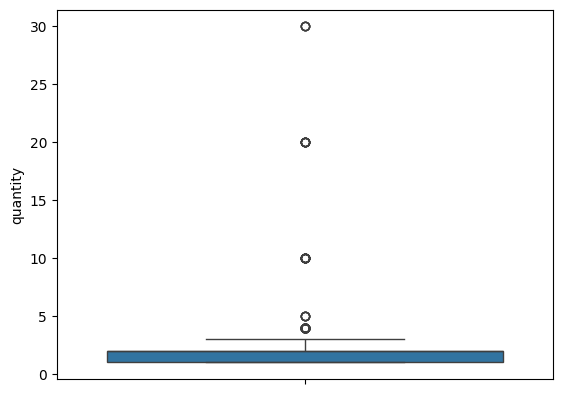

In [18]:
sns.boxplot(df["quantity"])

<Axes: ylabel='total_amount'>

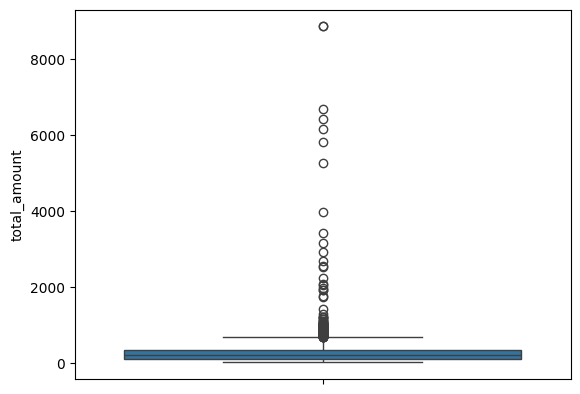

In [19]:
sns.boxplot(df["total_amount"])

In [20]:
if df["discount_pct"].max() > 1:
    df["discount_pct"] = df["discount_pct"] / 100

In [21]:
original_df = df.copy()

In [22]:
# IQR Capping for quantity
Q1 = df["quantity"].quantile(0.25)
Q3 = df["quantity"].quantile(0.75)
IQR = Q3 - Q1
lower_q = Q1 - 1.5 * IQR
upper_q = Q3 + 1.5 * IQR
df["quantity"] = df["quantity"].clip(lower=lower_q, upper=upper_q)

In [23]:
# Recalculate total_amount using company's formula
df["total_amount"] = (df["unit_price"] * df["quantity"]) * (1 - df["discount_pct"])
df["total_amount"] = df["total_amount"].round(2)

In [24]:
plt.figure(figsize=(18, 10))

<Figure size 1800x1000 with 0 Axes>

<Figure size 1800x1000 with 0 Axes>

Text(0.5, 1.0, 'Quantity - Before (Boxplot)')

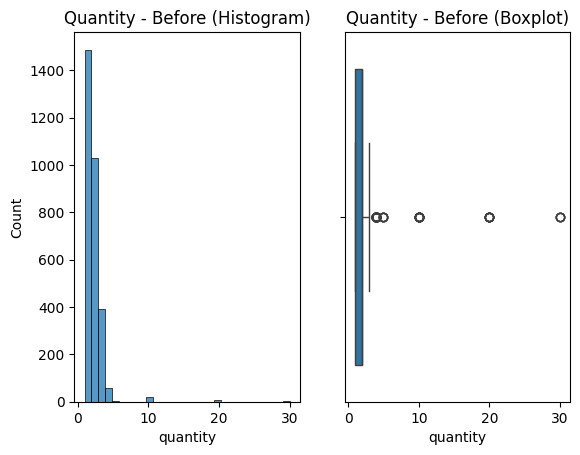

In [25]:
# Quantity Before
plt.subplot(1, 2, 1)
sns.histplot(original_df["quantity"], bins=30)
plt.title("Quantity - Before (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(x=original_df["quantity"])
plt.title("Quantity - Before (Boxplot)")

Text(0.5, 1.0, 'Quantity - After (Boxplot)')

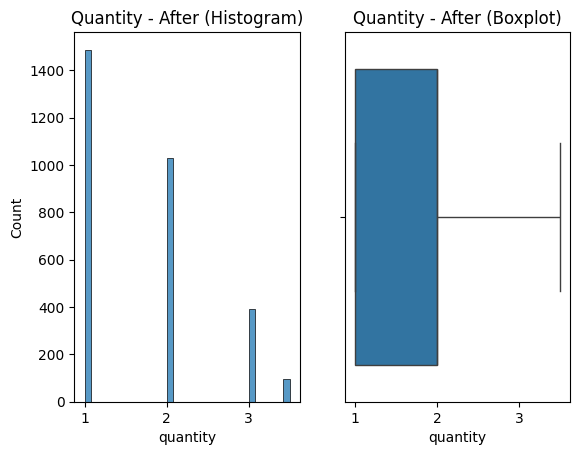

In [26]:
# Quantity After
plt.subplot(1, 2, 1)
sns.histplot(df["quantity"], bins=30)
plt.title("Quantity - After (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["quantity"])
plt.title("Quantity - After (Boxplot)")


Text(0.5, 1.0, 'Total Amount - Before (Boxplot)')

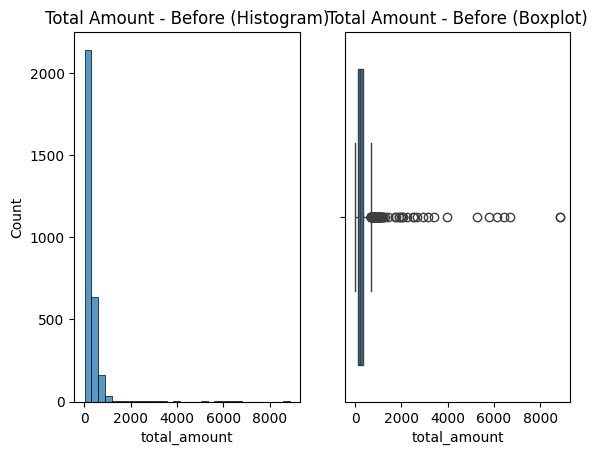

In [27]:
# Total Amount Before
plt.subplot(1, 2, 1)
sns.histplot(original_df["total_amount"], bins=30)
plt.title("Total Amount - Before (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(x=original_df["total_amount"])
plt.title("Total Amount - Before (Boxplot)")

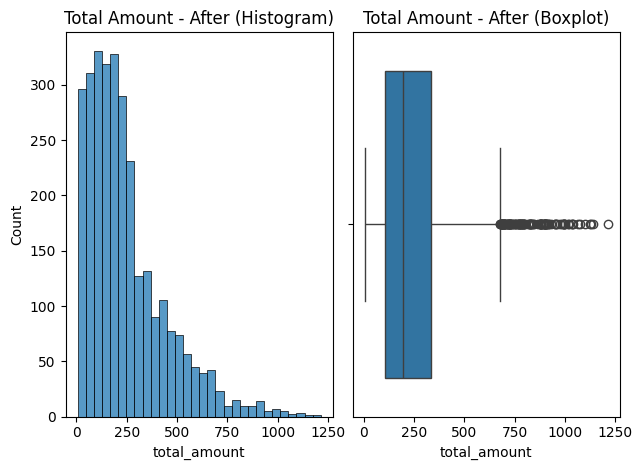

In [28]:
# Total Amount After
plt.subplot(1, 2, 1)
sns.histplot(df["total_amount"], bins=30)
plt.title("Total Amount - After (Histogram)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["total_amount"])
plt.title("Total Amount - After (Boxplot)")

plt.tight_layout()
plt.show()

In [29]:
df.describe()

,order_date,quantity,unit_price,discount_pct,total_amount
count,3000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2024-04-07 08:10:04.800000,1.681833,160.575730,0.088183,246.922410
min,2023-04-11 00:00:00,1.000000,6.770000,0.000000,6.970000
25%,2023-10-04 00:00:00,1.000000,83.700000,0.050000,107.252500
50%,2024-04-08 00:00:00,2.000000,159.700000,0.050000,196.595000
75%,2024-10-05 00:00:00,2.000000,229.400000,0.200000,335.795000
max,2025-04-10 00:00:00,3.500000,382.320000,0.200000,1213.360000
std,NaN,0.771936,91.219137,0.074831,196.203788


In [30]:
df.to_csv(r"C:\Users\yzdn\Desktop\Data Science\Intern Projects\Retail Analysic\Cleaned Data\Cleaned Sales Data.csv", index=False, encoding='utf-8')